# Finetune your Neural Network

**Exercise objectives:**
- `Finetune` the model optimizer
- `Save` and `Load` a `trained neural network`

<hr>

Now that you have solid foundations of what Neural Networks, how to design their architecture and how to regularize them, let's take a closer look at the `.compile(loss = ..., metrics = ..., activation = ...)` part.

# Data

We will use the data from the `Boston Housing dataset`. 

Our goal is to `predict the values of the houses` (in k USD), and we will measure our models' performances  using the `Mean Absolute Error` metrics

In [21]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import boston_housing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Count'>

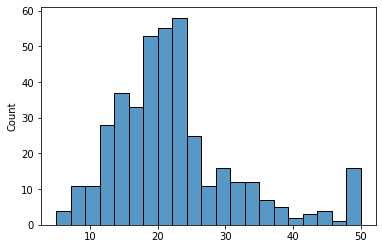

In [41]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
X_train.shape
sns.histplot(y_train)

In [33]:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [34]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


❓ **Question** ❓ Standardize `X_train` and `X_test` set without data leakage, and replace them keeping similar variable names

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

❓ **Question** ❓ To get a sense of a benchmark score you have to beat, what is the mean absolute error on the test set if your dumb prediction corresponds to the mean value of $y$ computed on the train set?

In [51]:
from sklearn.metrics import mean_absolute_error

y_train_mean = y_train.mean()
y_test_predictions = [y_train_mean] * len(y_test)
test_mae = mean_absolute_error(y_test, y_test_predictions)

# 1. The model

❓ **Question** ❓ Now, write a function `initialize_model` that generates a neural network with 3 layers: 
- a layer with 10 neurons and the `relu` activation function (choose the appropriate input dimension)
- a layer with 7 neurons and the `relu` activation function
- an appropriate layer corresponding to the problem at hand

In [35]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation

def initialize_model():
    model = Sequential()
    model.add(Dense(10, input_dim=13, activation='relu'))
    model.add(Dense(7, activation='relu'))
    model.add(Dense(1))
    
    return model

model = initialize_model()

# 2. The optimizer

❓ **Question** ❓ Write a function that :
* takes as arguments a model and an optimizer, 
* `compiles` the model,
* and returns the compiled model

Please select the `loss function` to be optimized and  the `metrics` on which the model should be evaluated wisely.

In [36]:
def compile_model(model, optimizer_name):
    model.compile(loss='mean_absolute_error', 
                  optimizer=optimizer_name,
                 metrics=['mae'])
  
    return model

model.compile(optimizer=Adam(), loss='mse')
model.fit(X_train, y_train, epochs=100)
print(model.summary())

Epoch 1/100
13/13 [==============================] - 2s 3ms/step - loss: 4154.1948
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 1913.3577
Epoch 3/100
13/13 [==============================] - 0s 3ms/step - loss: 834.6343
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 359.7617
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 236.8854
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 187.8190
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 149.0152
Epoch 8/100
13/13 [==============================] - 0s 3ms/step - loss: 121.5024
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 102.3893
Epoch 10/100
13/13 [==============================] - 0s 3ms/step - loss: 89.5451
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 80.8470
Epoch 12/100
13/13 [==============================] - 0s 3ms/step - loss: 75.6587
Epoch 13/100
1

13/13 [==============================] - 0s 3ms/step - loss: 29.5653
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                140       
                                                                 
 dense_9 (Dense)             (None, 7)                 77        
                                                                 
 dense_10 (Dense)            (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________
None


❓ **Question** ❓ Initialize the model, compile it with the `adam` optimizer and fit it on the data. 
- Evaluate your model using an Early Stopping criterion.

In [38]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

# Create an Early Stopping object
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# Fit the model on the training data with Early Stopping
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/100
13/13 [==============================] - 0s 16ms/step - loss: 20.9369 - val_loss: 36.1361
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 21.2295 - val_loss: 36.2872
Epoch 3/100
13/13 [==============================] - 0s 10ms/step - loss: 21.1463 - val_loss: 36.6609
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 21.0040 - val_loss: 36.7255
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 20.9605 - val_loss: 36.3545
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 20.5591 - val_loss: 35.7521
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 20.6522 - val_loss: 36.3992
Epoch 8/100
13/13 [==============================] - 0s 8ms/step - loss: 20.4677 - val_loss: 36.0495
Epoch 9/100
13/13 [==============================] - 0s 9ms/step - loss: 20.3098 - val_loss: 36.0645
Epoch 10/100
13/13 [==============================] - 0s 8ms/step - loss: 20.3555 - val_l

❓ **Question** ❓ Re-run the same model on the same data using different optimizers (in a `for` loop). 

For each optimizer, plot the history and report the corresponding Mean Absolute Error. (see [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)), as well as the time it took to fit your Neural Net.

In [52]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

4/4 [==============================] - 0s 5ms/step - loss: 3.0407 - mae: 3.0407
MAE with the rmsprop optimizer: 3.0407  reached in 27 s after 207 epochs


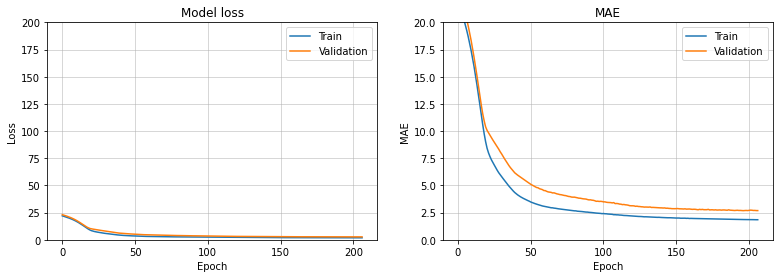

4/4 [==============================] - 0s 4ms/step - loss: 3.1231 - mae: 3.1231
MAE with the adam optimizer: 3.1231  reached in 35 s after 276 epochs


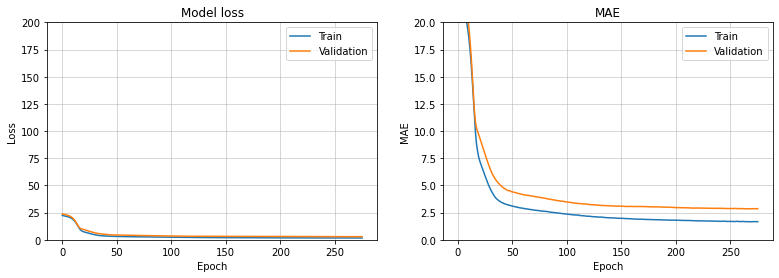

4/4 [==============================] - 0s 5ms/step - loss: 20.2810 - mae: 20.2810
MAE with the adagrad optimizer: 20.2810  reached in 61 s after 500 epochs


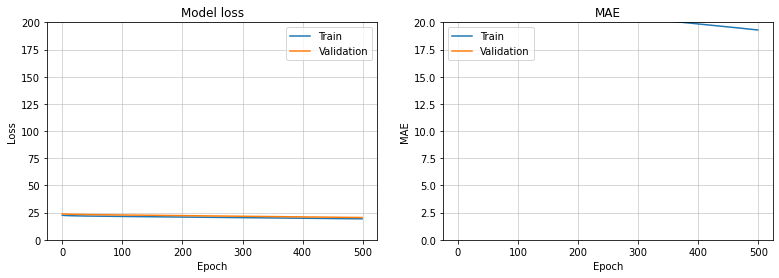

In [53]:
import time

for optimizer in ['rmsprop', 'adam', 'adagrad']:
    start_time = time.time()
    model = initialize_model()
    model = compile_model(model, optimizer)

    es = EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, 
                      batch_size=16, 
                      epochs=500, 
                      validation_split=0.3,
                      callbacks=[es], verbose=0)

    res = model.evaluate(X_test, y_test)[1]
    end_time = time.time()

    print(f'MAE with the {optimizer} optimizer: {res:.4f}  reached in {(end_time - start_time):.0f} s after {len(history.epoch)} epochs')
    plot_loss_mae(history)

❓ **Question** ❓ Are your predictions better than the benchmark model you've evaluated at the beginning of the notebook?

❗ **Remark** ❗ 
- Here, the optimizer is may not be central as the data are in low dimensions and and there are not many samples. However, in practice, you are advised to start with the `adam` optimizer by default which often works best. 

- Internally, when you call any optimizer with a string, the neural network initializes the hyperparameters the optimizer relies on. Among this hyperparameters, there is quite an important one, the **`learning rate`**. This learning rate corresponds to the intensity of change of the weights at each optimization of the neural network. Different learning rates have different consequences, as shown here : 

<img src="learning_rate.png" alt="Learning rate" style="height:350px;"/>


As the learning rate is initialized with default values when you compile the model optimizer with a string, let's see how to do it differently.


❓ **Question** ❓ Instead of initializing the optimizer with a string, we will initialize a real optimizer directly. Look at the documentation of [adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and instantiate it with a learning rate of $0.1$ - keep the other values to their default values. Use this optimizer in the `compile_model` function, fit the data and plot the history

Epoch 1/100
13/13 [==============================] - 2s 31ms/step - loss: 229.4254 - val_loss: 52.4664
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 42.7738 - val_loss: 37.2912
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 27.2219 - val_loss: 22.9749
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 19.8483 - val_loss: 26.4141
Epoch 5/100
13/13 [==============================] - 0s 10ms/step - loss: 17.3940 - val_loss: 25.1633
Epoch 6/100
13/13 [==============================] - 0s 10ms/step - loss: 14.6378 - val_loss: 22.7766
Epoch 7/100
13/13 [==============================] - 0s 12ms/step - loss: 13.7197 - val_loss: 28.9482
Epoch 8/100
13/13 [==============================] - 0s 11ms/step - loss: 12.2943 - val_loss: 24.9483
Epoch 9/100
13/13 [==============================] - 0s 12ms/step - loss: 13.4239 - val_loss: 21.8967
Epoch 10/100
13/13 [==============================] - 0s 13ms/step - loss: 10.6007 -

Epoch 82/100
13/13 [==============================] - 0s 9ms/step - loss: 7.1357 - val_loss: 16.1924
Epoch 83/100
13/13 [==============================] - 0s 9ms/step - loss: 6.3770 - val_loss: 17.5712
Epoch 84/100
13/13 [==============================] - 0s 9ms/step - loss: 6.2129 - val_loss: 16.3900
Epoch 85/100
13/13 [==============================] - 0s 9ms/step - loss: 6.5447 - val_loss: 18.1916
Epoch 86/100
13/13 [==============================] - 0s 14ms/step - loss: 6.6753 - val_loss: 15.6608
Epoch 87/100
13/13 [==============================] - 0s 13ms/step - loss: 6.6552 - val_loss: 19.0770
Epoch 88/100
13/13 [==============================] - 0s 12ms/step - loss: 6.4222 - val_loss: 16.1085
Epoch 89/100
13/13 [==============================] - 0s 15ms/step - loss: 6.8228 - val_loss: 19.2371
Epoch 90/100
13/13 [==============================] - 0s 12ms/step - loss: 10.2487 - val_loss: 18.1761
Epoch 91/100
13/13 [==============================] - 0s 14ms/step - loss: 8.8064 - v

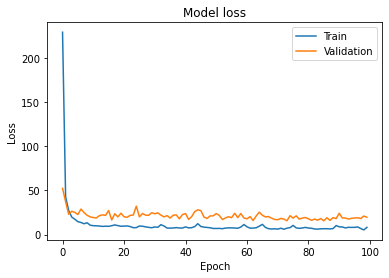

In [56]:
# YOUR CODE HERE
optimizer = Adam(learning_rate=0.1)

#use the optimizer in the compile model
model.compile(optimizer=optimizer, loss='mse')

#fit the data
history = model.fit(X_train, y_train, batch_size=32, epochs=100,
                   validation_data=(X_test, y_test))

#plot the history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

❓ **Question** ❓ Now, reproduce the same plots and results but for different learning rates.

*Remark*: There is a chance that the y-axis is too large for you to visualize the results. In that case, rewrite the plot function to plot only the epochs > 10.

Epoch 1/10
13/13 [==============================] - 2s 41ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 0s 9ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 5/10
13/13 [==============================] - 0s 9ms/step - loss: -326.2581 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 6/10
13/13 [==============================] - 0s 9ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 7/10
13/13 [==============================] - 0s 10ms/step - loss: -3

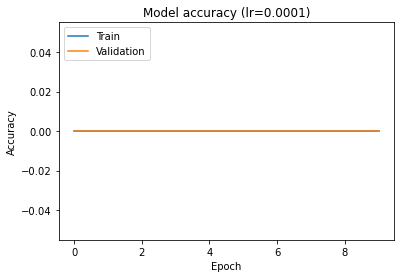

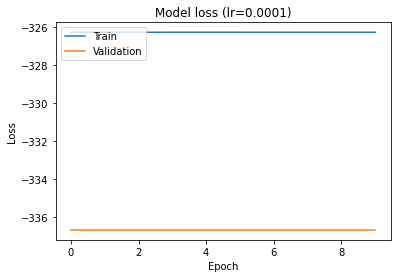

Epoch 1/10
13/13 [==============================] - 3s 39ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 0s 9ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 5/10
13/13 [==============================] - 0s 9ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 6/10
13/13 [==============================] - 0s 9ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 7/10
13/13 [==============================] - 0s 9ms/step - loss: -32

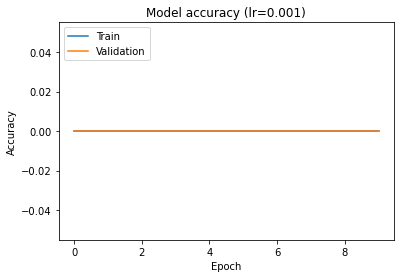

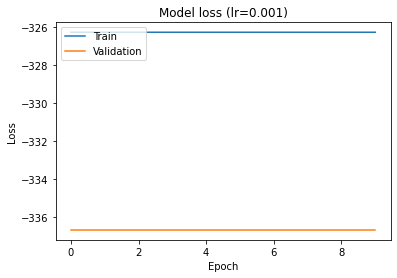

Epoch 1/10
13/13 [==============================] - 2s 40ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 0s 9ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 3/10
13/13 [==============================] - 0s 9ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 4/10
13/13 [==============================] - 0s 9ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 5/10
13/13 [==============================] - 0s 9ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 7/10
13/13 [==============================] - 0s 9ms/step - loss: -32

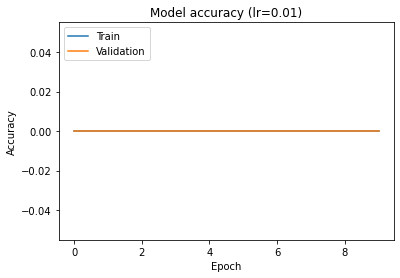

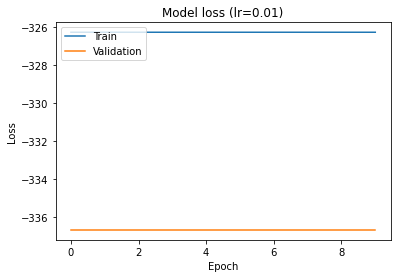

Epoch 1/10
13/13 [==============================] - 2s 42ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 5/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: -32

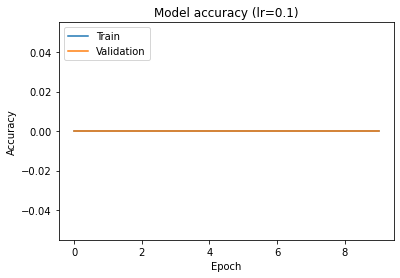

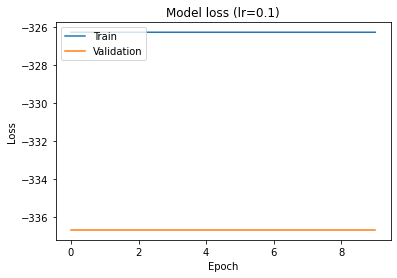

Epoch 1/10
13/13 [==============================] - 2s 39ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2581 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 5/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: -32

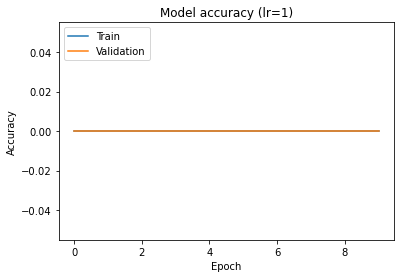

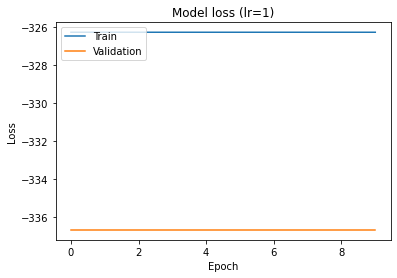

Epoch 1/10
13/13 [==============================] - 2s 39ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2581 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 5/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: -326.2582 - accuracy: 0.0000e+00 - val_loss: -336.6793 - val_accuracy: 0.0000e+00
Epoch 7/10
13/13 [==============================] - 0s 8ms/step - loss: -32

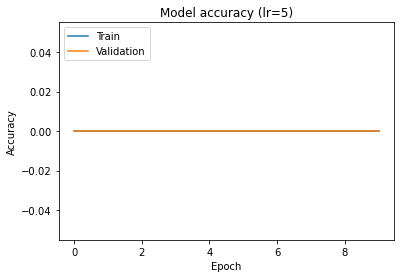

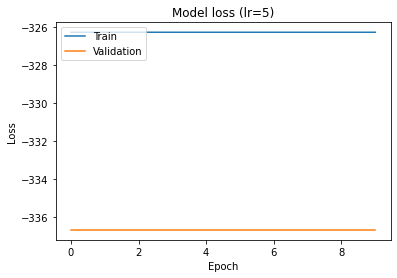

In [61]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 5]

for lr in learning_rates:
    optimizer = Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss='binary_crossentropy',
                 metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=10, batch_size=32,
                       validation_data=(X_test, y_test))
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy (lr=' + str(lr) + ')')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss (lr=' + str(lr) + ')')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show() 
   

# 3. The loss

⚠️ It is important to **clearly understand the different between metrics and losses**. 

* The `loss functions` are computed *during* the training procedure
* The `metrics` are computed *after* training your models !
* Some metrics can be used as loss functions too... as long as they are differentiable ! (e.g. the *MSE*)

❓ **Question** ❓ Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  

In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

In [63]:
# YOUR CODE HERE
model.compile(optimizer='adam', loss='mae')

model.compile(optimizer='adam', loss='mse')

❗️ Countrary to first intuition, it can be sometimes better to use the MSE as the loss function in order to get the best MAE possible in the end!

<details>
    <summary>▶ Why?</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameter are best suited to the MSE than to the MAE loss?

</details>

### 🧪 Test your model best performance

❓ Save your best model performance on the test set at `mae_test` and check it out below

In [9]:

# YOUR CODE HERE

# 4 : Save and load a model

❓ **Question** ❓  Save your model using `.save_model(model, 'name_of_my_model')` method that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model)..

❓ **Question** ❓ Now, in a variable that you will call `loaded_model`, load the model you just saved thanks to `.load_model('name_of_your_model')` [(documentation here)](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model), and evaluate it on the test data to check that it gives the same result as before.

In [10]:
# YOUR CODE

## (Optional) `Exponential Decay` for the Optimizer's Learning Rate

The next question is not essential and can be skipped as many algorithms can be run without such optimization. 

Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need large learning rates, and as the neural network converges and get closer to the minimum loss value, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question** ❓ Use the [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) in the `adam` optimizer and run it on the previous data. Start with the following:

```python
initial_learning_rate = 0.001 # start with default ADAM value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps=5000, decay_rate=0.7,
)
```

In [11]:
# YOUR CODE HERE